![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Perform the hyperparameter search for shallow multivariable neural network

In [44]:
import numpy as np
import seaborn as sns
import matplotlib as plt
import datetime
import re
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
a = np.arange(5)
a + 20

array([20, 21, 22, 23, 24])

# Find and Visualize the best hyperparameter values for the shallow neural network

In [3]:
# First we load all the libraries
import pandas as pd
import matplotlib as plt
import sys

In [5]:
# We load the data

msnn = pd.read_csv("../Experimental_results/Experiment5_MultivariableShallowNN_HyperparamSearchResults.csv")
msnn_long = pd.read_csv("../Experimental_results/Experiment5_MultivariableShallowNN_HyperparamSearchResults_longformat.csv")

Shape of Data Frame msnn
(864, 23)
Index(['Unnamed: 0', 'model_num', 'optimizer', 'loss_fn', 'activation_fn',
       'output_activation_fn', 'epochs', 'batch_size', 'neurons_in_inputlayer',
       'num_hiddenlayer', 'neurons_in_hiddenlayer', 'num_dropout_layers',
       'loss', 'mse_test', 'mae_test', 'mape_test', 'cosine_similarity_test',
       'rmse_test', 'msle_test', 'validation_split', 'input_dimensions',
       'corr', 'total_runtime'],
      dtype='object')
I like to print stuff


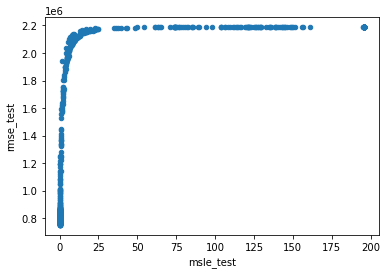

In [6]:

#sys.stdout = open("test.txt", "w")

print("Shape of Data Frame msnn")
print(msnn.shape)
#print(msnn.head())

print(msnn.columns)
msnn.plot(kind = 'scatter', x = 'msle_test', y = 'rmse_test')
print("I like to print stuff")

#msnn.info()
#msnn.describe()
#sys.stdout.close()

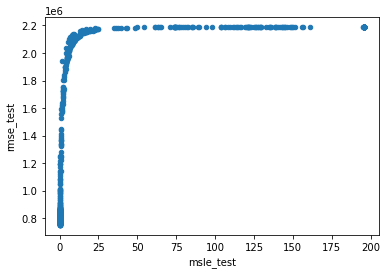

In [7]:
msnn.plot(kind = 'scatter', x = 'msle_test', y = 'rmse_test')
plt.pyplot.savefig('msetest_vs_msletest_msnn_hyperparasearchresults.png')
plt.pyplot.savefig('msetest_vs_msletest_msnn_hyperparasearchresults_v2.png', bbox_inches='tight')

In [8]:
msnn.info()

msnn.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              864 non-null    int64  
 1   model_num               864 non-null    float64
 2   optimizer               864 non-null    object 
 3   loss_fn                 864 non-null    object 
 4   activation_fn           864 non-null    object 
 5   output_activation_fn    864 non-null    object 
 6   epochs                  864 non-null    float64
 7   batch_size              864 non-null    float64
 8   neurons_in_inputlayer   864 non-null    float64
 9   num_hiddenlayer         864 non-null    float64
 10  neurons_in_hiddenlayer  864 non-null    float64
 11  num_dropout_layers      864 non-null    float64
 12  loss                    864 non-null    float64
 13  mse_test                864 non-null    float64
 14  mae_test                864 non-null    fl

,Unnamed: 0,model_num,epochs,batch_size,neurons_in_inputlayer,num_hiddenlayer,neurons_in_hiddenlayer,num_dropout_layers,loss,mse_test,mae_test,mape_test,cosine_similarity_test,rmse_test,msle_test,validation_split,input_dimensions,corr
count,864.000000,864.000000,864.00000,864.000000,864.000000,864.0,864.000000,864.0,8.640000e+02,8.640000e+02,8.640000e+02,864.000000,864.000000,8.640000e+02,864.000000,8.640000e+02,864.0,8.640000e+02
mean,431.500000,431.500000,75.00000,35.750000,5.333333,1.0,5.333333,0.0,9.979073e+11,3.034371e+12,1.118777e+06,74.321299,0.682073,1.622156e+06,75.747142,2.000000e-01,28.0,5.289032e-01
std,249.559612,249.559612,25.01448,38.793418,3.683920,0.0,3.683920,0.0,1.784629e+12,1.908946e+12,4.896649e+05,27.916541,0.464978,6.351767e+05,88.627880,1.471898e-15,0.0,1.221953e-14
min,0.000000,0.000000,50.00000,1.000000,1.000000,1.0,1.000000,0.0,1.677311e-01,5.629687e+11,4.330559e+05,33.754726,0.000000,7.503124e+05,0.167731,2.000000e-01,28.0,5.289032e-01
25%,215.750000,215.750000,50.00000,7.750000,1.000000,1.0,1.000000,0.0,1.958067e+02,7.036205e+11,5.279144e+05,41.119702,0.000000,8.388209e+05,0.233861,2.000000e-01,28.0,5.289032e-01
50%,431.500000,431.500000,75.00000,21.000000,5.000000,1.0,5.000000,0.0,1.039323e+06,4.339038e+12,1.467487e+06,92.990589,1.000000,2.083035e+06,8.179071,2.000000e-01,28.0,5.289032e-01
75%,647.250000,647.250000,100.00000,49.000000,10.000000,1.0,10.000000,0.0,7.355245e+11,4.781299e+12,1.556716e+06,100.000000,1.000000,2.186618e+06,195.806717,2.000000e-01,28.0,5.289032e-01
max,863.000000,863.000000,100.00000,100.000000,10.000000,1.0,10.000000,0.0,4.781299e+12,4.781299e+12,1.556716e+06,100.000000,1.000000,2.186618e+06,195.806717,2.000000e-01,28.0,5.289032e-01


## Convert categorical variables into dummy variabes. 

In [11]:
dummy = pd.get_dummies(msnn)
len(dummy.columns)

27

In [16]:
dummy = pd.get_dummies(msnn, drop_first=True)
len(dummy.columns)

22

In [18]:
dummy.columns

Index(['Unnamed: 0', 'model_num', 'epochs', 'batch_size',
       'neurons_in_inputlayer', 'num_hiddenlayer', 'neurons_in_hiddenlayer',
       'num_dropout_layers', 'loss', 'mse_test', 'mae_test', 'mape_test',
       'cosine_similarity_test', 'rmse_test', 'msle_test', 'validation_split',
       'input_dimensions', 'corr', 'optimizer_nadam', 'loss_fn_mse',
       'loss_fn_msle', 'activation_fn_selu'],
      dtype='object')

In [ ]:
#dummy_df = dummy.drop()

## Statistical Analysis to understand how the hyperparameters affect the performance of the neural network. 

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [22]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('rmse_test ~  epochs + batch_size + neurons_in_inputlayer + neurons_in_hiddenlayer + optimizer_nadam + loss_fn_mse + loss_fn_msle + activation_fn_selu', data=dummy).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              rmse_test   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     40.35
Date:                Mon, 10 May 2021   Prob (F-statistic):           9.49e-55
Time:                        14:59:06   Log-Likelihood:                -12632.
No. Observations:                 864   AIC:                         2.528e+04
Df Residuals:                     855   BIC:                         2.532e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.96

Need to check how well the assumptions of the linear regression fit this model so we can assess how well this model explains the effect of hyperparameters on the performance of the neural networks. Need to check residual plots so we can check the following assumptions:

1. Errors are independant. 
2. Errors have constant variance.
3. Relationships between the covariates and y are linear.
4. The residudal plots are constant. 


The R<sup>2 </sup> is 0.27, hence 27% of the variation in the data is explained by our mulivariable linear regression model. 

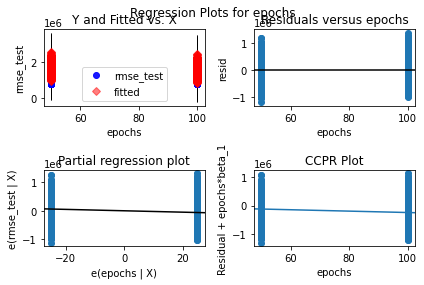

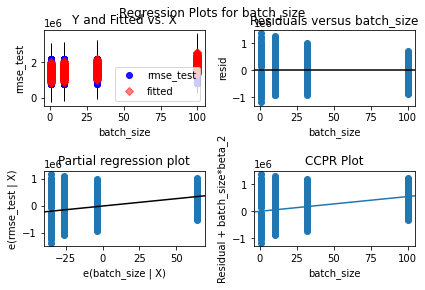

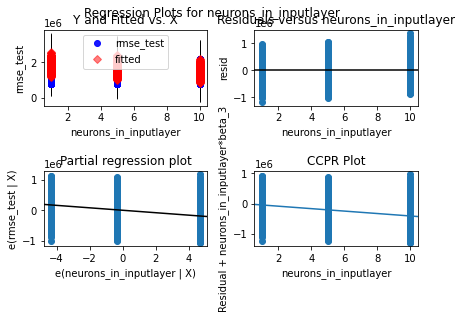

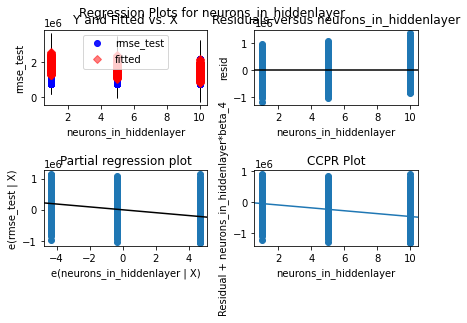

In [37]:
import matplotlib as plt

variable_list = [ 'epochs' ,'batch_size' ,'neurons_in_inputlayer','neurons_in_hiddenlayer']
#fig = plt.figure(figsize=(12,8))

#produce regression plots

for variable in variable_list:
    #fig = sm.graphics.plot_regress_exog(results, variable, fig=fig)
    sm.graphics.plot_regress_exog(results, variable)

In [42]:
idx_min_rmse = msnn.rmse_test.idxmin()
print(idx_min_rmse)

msnn.iloc[idx_min_rmse]

833


Unnamed: 0                                   833
model_num                                    833
optimizer                                   adam
loss_fn                                     msle
activation_fn                               selu
output_activation_fn                        relu
epochs                                       100
batch_size                                     1
neurons_in_inputlayer                          5
num_hiddenlayer                                1
neurons_in_hiddenlayer                        10
num_dropout_layers                             0
loss                                    0.179068
mse_test                             5.62969e+11
mae_test                                  437824
mape_test                                37.0595
cosine_similarity_test                         1
rmse_test                                 750312
msle_test                               0.179068
validation_split                             0.2
input_dimensions    

The combination of hyperparameters that give the minimum rmse test value is consistant with the mulivariable linear regression model we created.

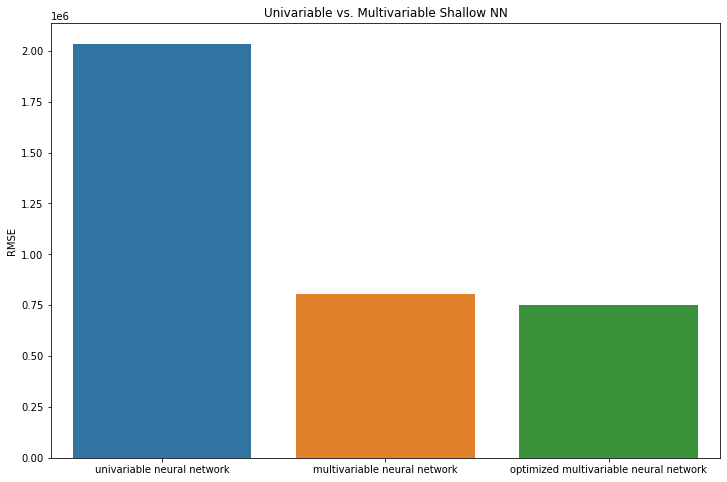

In [48]:
plt.pyplot.figure(figsize=(12, 8))
ax = sns.barplot(x=["univariable neural network", "multivariable neural network", "optimized multivariable neural network"], y=[2035016.625,804724.75, 750312])
ax.set_ylabel("RMSE")
ax.set_title("Univariable vs. Multivariable Shallow NN")
#ax1.set_ylabel('volts')
plt.pyplot.savefig('test_rmse_usnn_msnn_optmsnn.png')

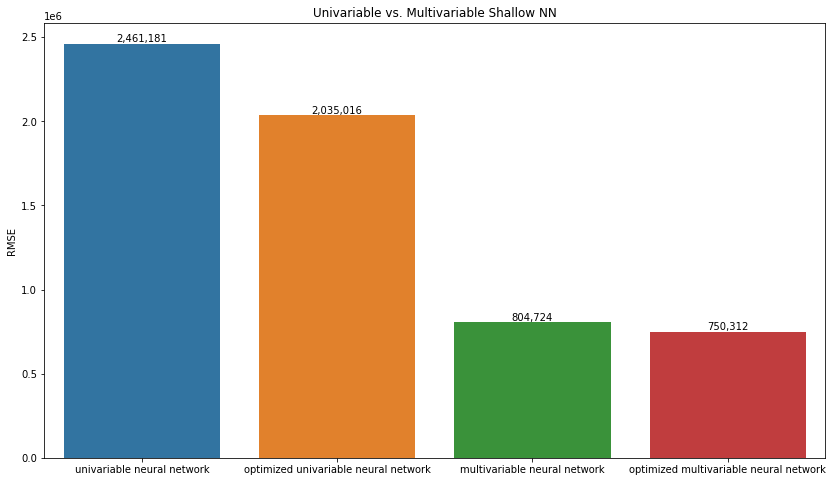

In [57]:
plt.pyplot.figure(figsize=(14, 8))

ax = sns.barplot(x=["univariable neural network", "optimized univariable neural network", "multivariable neural network", "optimized multivariable neural network"], y=[2461181, 2035016.625,804724.75, 750312])
ax.set_ylabel("RMSE")
ax.set_title("Univariable vs. Multivariable Shallow NN")
rects = ax.patches
labels=['2,461,181', '2,035,016', '804,724', '750,312']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.pyplot.savefig('test_rmse_usnn_optusnn_msnn_optmsnn.png')

In [62]:
def per_fun(first, second):
    percent_value = (first - second) / second 
    return( print(round(percent_value*100, 2), '%') )

per_fun(2461181, 2035016.625)
per_fun(804724.75,750312)

20.94 %
7.25 %


We will now plot and visulize the results of shallow multivariable neural network hyperparameter results. 